## Problem Overview

We analyze the historical performance of five sector-diverse companies across three major global crises using stock price behavior: 2008 Financial Crisis, COVID-19 Crash, and the 2022 Inflation + Russia-Ukraine War.

In [1]:
!pip install yfinance pandas openpyxl

import yfinance as yf
import pandas as pd

In [2]:
tickers = ['AAPL','XOM','JNJ','JPM','PG']

In [3]:
df = yf.download(tickers, start="2007-01-01", end="2024-01-01", auto_adjust=True)

[*********************100%***********************]  5 of 5 completed


In [4]:
df.head()

Price          Close                                                  High  \
Ticker          AAPL        JNJ        JPM         PG        XOM      AAPL   
Date                                                                         
2007-01-03  2.518541  38.572319  29.818949  37.885509  38.971268  2.602092   
2007-01-04  2.574442  39.054459  29.893404  37.597870  38.240330  2.583157   
2007-01-05  2.556108  38.700111  29.645252  37.275005  38.513771  2.590670   
2007-01-08  2.568731  38.636211  29.744520  37.357182  38.203499  2.600589   
2007-01-09  2.782115  38.490982  29.620440  37.263279  37.909027  2.794438   

Price                                                   ...      Open  \
Ticker            JNJ        JPM         PG        XOM  ...      AAPL   
Date                                                    ...             
2007-01-03  38.978953  30.005045  37.955952  40.107117  ...  2.593376   
2007-01-04  39.281012  30.116721  37.862022  38.860841  ...  2.526055   
2007-01-05  39.066082  29.930600  37.568509  38.587391  ...  2.577747   
2007-01-08  38.775628  29.812756  37.439362  39.044869  ...  2.583458   
2007-01-09  38.833716  29.843756  37.451121  38.303420  ...  2.598184   

Price                                                       Volume            \
Ticker            JNJ        JPM         PG        XOM        AAPL       JNJ   
Date                                                                           
2007-01-03  38.415471  29.775526  37.404163  40.101861  1238319600  12845300   
2007-01-04  38.281850  29.806559  37.768098  38.834547   847260400  11262000   
2007-01-05  38.804675  29.880973  37.492198  38.098343   834741600   8141100   
2007-01-08  38.636211  29.508797  37.327832  38.850300   797106800   6180400   
2007-01-09  38.688489  29.713489  37.210448  37.782823  3349298400   7147100   

Price                                     
Ticker           JPM        PG       XOM  
Date                                      
2007-01-03  14244700   9717900  30510700  
2007-01-04   9471500   8711400  31046600  
2007-01-05  10760500   9907900  24671500  
2007-01-08   8239200  11068200  25981900  
2007-01-09   9276700  10823800  27039900  

[5 rows x 25 columns]

In [5]:
df.to_csv('stocks_data')

In [6]:
df.index.duplicated().any()

False

In [7]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close',  'JNJ'),
            ( 'Close',  'JPM'),
            ( 'Close',   'PG'),
            ( 'Close',  'XOM'),
            (  'High', 'AAPL'),
            (  'High',  'JNJ'),
            (  'High',  'JPM'),
            (  'High',   'PG'),
            (  'High',  'XOM'),
            (   'Low', 'AAPL'),
            (   'Low',  'JNJ'),
            (   'Low',  'JPM'),
            (   'Low',   'PG'),
            (   'Low',  'XOM'),
            (  'Open', 'AAPL'),
            (  'Open',  'JNJ'),
            (  'Open',  'JPM'),
            (  'Open',   'PG'),
            (  'Open',  'XOM'),
            ('Volume', 'AAPL'),
            ('Volume',  'JNJ'),
            ('Volume',  'JPM'),
            ('Volume',   'PG'),
            ('Volume',  'XOM')],
           names=['Price', 'Ticker'])

In [8]:
df.sample(5)

Price            Close                                                 \
Ticker            AAPL         JNJ         JPM          PG        XOM   
Date                                                                    
2007-11-15    4.937903   39.597759   27.628866   43.052792  45.165539   
2014-10-24   23.274584   76.477074   43.848667   63.072899  59.591331   
2017-03-09   32.169884  100.188133   72.678535   71.935417  56.060978   
2019-04-04   46.814907  113.645218   88.555397   87.927048  61.006905   
2021-11-08  147.659195  145.899506  152.949646  132.039062  57.280632   

Price             High                                                 ...  \
Ticker            AAPL         JNJ         JPM          PG        XOM  ...   
Date                                                                   ...   
2007-11-15    5.096891   39.846433   28.682482   43.448374  46.330894  ...   
2014-10-24   23.334307   76.595726   43.878524   63.672815  59.616559  ...   
2017-03-09   32.195401  100.394954   73.130941   72.054860  56.095302  ...   
2019-04-04   46.977582  114.852326   88.698017   88.131073  61.029210  ...   
2021-11-08  148.768312  147.064053  154.632400  133.086638  57.855875  ...   

Price             Open                                                 \
Ticker            AAPL         JNJ         JPM          PG        XOM   
Date                                                                    
2007-11-15    5.000717   39.526714   28.308004   42.795062  45.812364   
2014-10-24   23.265736   76.343593   43.296265   63.028457  59.402136   
2017-03-09   32.183805   99.098357   72.702345   71.776165  55.353953   
2019-04-04   46.599598  114.734968   87.708102   87.969556  60.315418   
2021-11-08  148.611266  146.625104  152.940604  132.540076  57.132464   

Price           Volume                                          
Ticker            AAPL       JNJ       JPM        PG       XOM  
Date                                                            
2007-11-15  1487410400  11491600  23434200  11440000  23708600  
2014-10-24   188215600   5973100  13758000  13465600   9734100  
2017-03-09    88623600   8571100  13726200   5587400  14721800  
2019-04-04    76457200   5844600  11952100   4786100   9360600  
2021-11-08    55020900   5578800   6413700   5854400  17696000  

[5 rows x 25 columns]

In [9]:
df.columns.values

array([('Close', 'AAPL'), ('Close', 'JNJ'), ('Close', 'JPM'),
       ('Close', 'PG'), ('Close', 'XOM'), ('High', 'AAPL'),
       ('High', 'JNJ'), ('High', 'JPM'), ('High', 'PG'), ('High', 'XOM'),
       ('Low', 'AAPL'), ('Low', 'JNJ'), ('Low', 'JPM'), ('Low', 'PG'),
       ('Low', 'XOM'), ('Open', 'AAPL'), ('Open', 'JNJ'), ('Open', 'JPM'),
       ('Open', 'PG'), ('Open', 'XOM'), ('Volume', 'AAPL'),
       ('Volume', 'JNJ'), ('Volume', 'JPM'), ('Volume', 'PG'),
       ('Volume', 'XOM')], dtype=object)

In [10]:
df.columns = ['_'.join(col).strip() for col in df.columns.values]

In [11]:
df[['Close_AAPL', 'Close_JNJ', 'Close_JPM', 'Close_PG', 'Close_XOM']].to_excel("stock_close_prices.xlsx", index=True)

In [12]:
df

,Close_AAPL,Close_JNJ,Close_JPM,Close_PG,Close_XOM,High_AAPL,High_JNJ,High_JPM,High_PG,High_XOM,...,Open_AAPL,Open_JNJ,Open_JPM,Open_PG,Open_XOM,Volume_AAPL,Volume_JNJ,Volume_JPM,Volume_PG,Volume_XOM
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,2.518541,38.572319,29.818949,37.885509,38.971268,2.602092,38.978953,30.005045,37.955952,40.107117,...,2.593376,38.415471,29.775526,37.404163,40.101861,1238319600,12845300,14244700,9717900,30510700
2007-01-04,2.574442,39.054459,29.893404,37.597870,38.240330,2.583157,39.281012,30.116721,37.862022,38.860841,...,2.526055,38.281850,29.806559,37.768098,38.834547,847260400,11262000,9471500,8711400,31046600
2007-01-05,2.556108,38.700111,29.645252,37.275005,38.513771,2.590670,39.066082,29.930600,37.568509,38.587391,...,2.577747,38.804675,29.880973,37.492198,38.098343,834741600,8141100,10760500,9907900,24671500
2007-01-08,2.568731,38.636211,29.744520,37.357182,38.203499,2.600589,38.775628,29.812756,37.439362,39.044869,...,2.583458,38.636211,29.508797,37.327832,38.850300,797106800,6180400,8239200,11068200,25981900
2007-01-09,2.782115,38.490982,29.620440,37.263279,37.909027,2.794438,38.833716,29.843756,37.451121,38.303420,...,2.598184,38.688489,29.713489,37.210448,37.782823,3349298400,7147100,9276700,10823800,27039900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,192.192551,148.222015,160.884933,139.068115,96.783318,193.989390,149.242190,161.682632,139.403156,97.761501,...,193.761051,148.021786,160.981047,138.321468,97.163189,37149600,3798900,6576300,4413800,12927800
2023-12-26,191.646561,148.870346,161.836395,139.699905,97.001747,192.480450,149.070575,162.201611,139.920067,97.846974,...,192.202487,147.783423,160.942597,138.886244,97.571562,28919300,4170000,4683600,3634900,16835100
2023-12-27,191.745819,149.070557,162.807083,139.814774,96.545891,192.093281,149.232640,162.874366,140.054084,97.391118,...,191.090629,148.260126,161.307799,139.422301,96.906772,48087700,5288100,6428600,4569400,14558800


In [13]:
df = df.dropna(how='any')
df

,Close_AAPL,Close_JNJ,Close_JPM,Close_PG,Close_XOM,High_AAPL,High_JNJ,High_JPM,High_PG,High_XOM,...,Open_AAPL,Open_JNJ,Open_JPM,Open_PG,Open_XOM,Volume_AAPL,Volume_JNJ,Volume_JPM,Volume_PG,Volume_XOM
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,2.518541,38.572319,29.818949,37.885509,38.971268,2.602092,38.978953,30.005045,37.955952,40.107117,...,2.593376,38.415471,29.775526,37.404163,40.101861,1238319600,12845300,14244700,9717900,30510700
2007-01-04,2.574442,39.054459,29.893404,37.597870,38.240330,2.583157,39.281012,30.116721,37.862022,38.860841,...,2.526055,38.281850,29.806559,37.768098,38.834547,847260400,11262000,9471500,8711400,31046600
2007-01-05,2.556108,38.700111,29.645252,37.275005,38.513771,2.590670,39.066082,29.930600,37.568509,38.587391,...,2.577747,38.804675,29.880973,37.492198,38.098343,834741600,8141100,10760500,9907900,24671500
2007-01-08,2.568731,38.636211,29.744520,37.357182,38.203499,2.600589,38.775628,29.812756,37.439362,39.044869,...,2.583458,38.636211,29.508797,37.327832,38.850300,797106800,6180400,8239200,11068200,25981900
2007-01-09,2.782115,38.490982,29.620440,37.263279,37.909027,2.794438,38.833716,29.843756,37.451121,38.303420,...,2.598184,38.688489,29.713489,37.210448,37.782823,3349298400,7147100,9276700,10823800,27039900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,192.192551,148.222015,160.884933,139.068115,96.783318,193.989390,149.242190,161.682632,139.403156,97.761501,...,193.761051,148.021786,160.981047,138.321468,97.163189,37149600,3798900,6576300,4413800,12927800
2023-12-26,191.646561,148.870346,161.836395,139.699905,97.001747,192.480450,149.070575,162.201611,139.920067,97.846974,...,192.202487,147.783423,160.942597,138.886244,97.571562,28919300,4170000,4683600,3634900,16835100
2023-12-27,191.745819,149.070557,162.807083,139.814774,96.545891,192.093281,149.232640,162.874366,140.054084,97.391118,...,191.090629,148.260126,161.307799,139.422301,96.906772,48087700,5288100,6428600,4569400,14558800


In [14]:
returns = df[['Close_AAPL', 'Close_JNJ', 'Close_JPM', 'Close_PG', 'Close_XOM']].pct_change()

In [15]:
returns

,Close_AAPL,Close_JNJ,Close_JPM,Close_PG,Close_XOM
Date,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.022196,0.012500,0.002497,-0.007592,-0.018756
2007-01-05,-0.007121,-0.009073,-0.008301,-0.008587,0.007151
2007-01-08,0.004938,-0.001651,0.003349,0.002205,-0.008056
2007-01-09,0.083070,-0.003759,-0.004172,-0.002514,-0.007708
...,...,...,...,...,...
2023-12-22,-0.005547,0.004004,-0.000597,0.007071,0.001769
2023-12-26,-0.002841,0.004374,0.005914,0.004543,0.002257
2023-12-27,0.000518,0.001345,0.005998,0.000822,-0.004699


In [16]:
returns = returns.dropna(how='any')

In [17]:
returns.to_excel("stock_returns.xlsx", index=True)

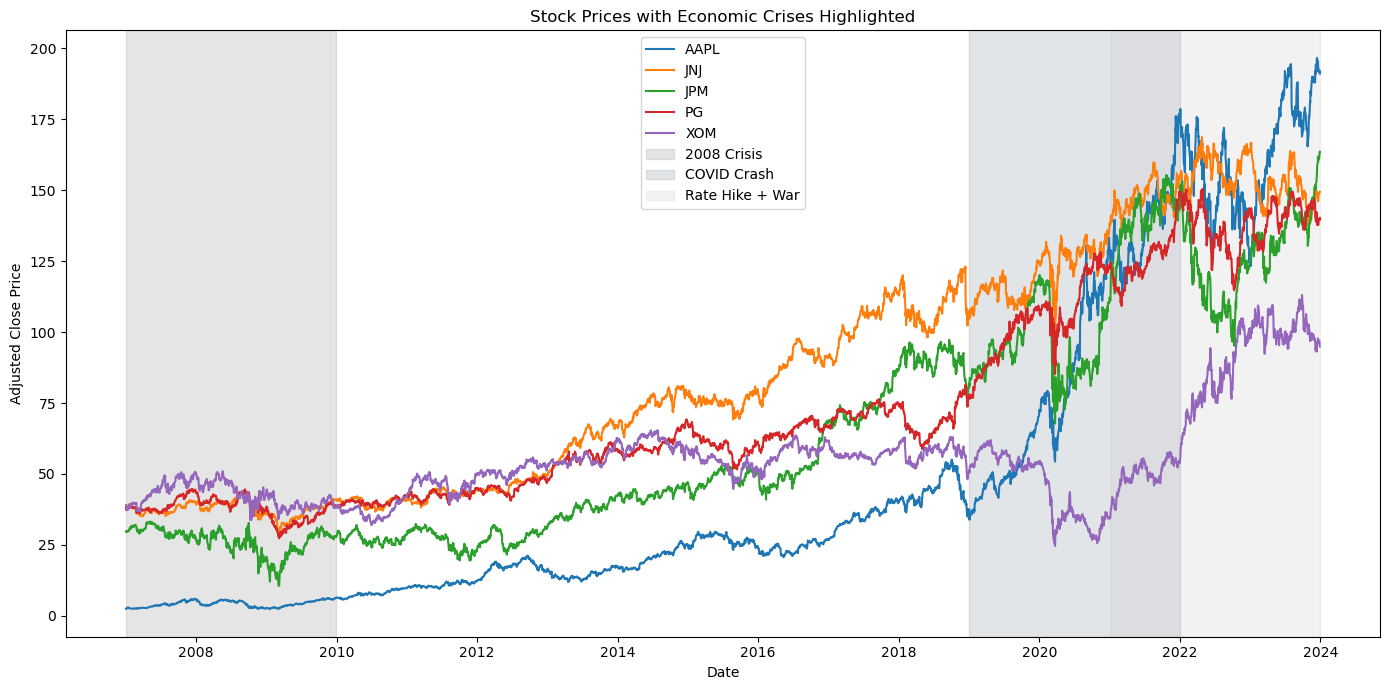

In [18]:
import matplotlib.pyplot as plt

crisis_periods = {
    '2008 Crisis': ('2007-01-01', '2009-12-31'),
    'COVID Crash': ('2019-01-01', '2021-12-31'),
    'Rate Hike + War': ('2021-01-01', '2023-12-31'),
}

# Plot stock prices
plt.figure(figsize=(14, 7))
for ticker in ['AAPL', 'JNJ', 'JPM', 'PG', 'XOM']:
    plt.plot(df.index, df[f'Close_{ticker}'], label=ticker)
colors = ['grey', 'slategrey', 'silver']
for (crisis, (start, end)), shade in zip(crisis_periods.items(), colors):
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=shade, alpha=0.2, label=crisis)

plt.title("Stock Prices with Economic Crises Highlighted")
plt.xlabel("Year")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.tight_layout()
plt.show()

### Stock Prices with Economic Crises Highlighted

This plot shows the historical stock prices of five companies from different sectors, with shaded regions marking three major crises: the 2008 Financial Crisis, the COVID-19 Crash, and the recent Inflation & War period.

**Insights:**
- **AAPL (Tech)** shows a strong long-term upward trend, rebounding quickly from all three crises. Especially after COVID, it rebounded aggressively, reflecting tech sector resilience during digital transformation periods.
- **JPM (Financial)** took a major hit in 2008, with a ~68% drawdown and no full recovery by 2010, showing how financials are highly sensitive to systemic banking shocks.  Also suffered in COVID and 2022, which shows how finance is a sector which is majorly affected.
- **XOM (Energy)** had a massive ~55% drawdown during COVID, but furthur it saw no real crash, likely buoyed by rising oil prices amid supply disruptions (Russia-Ukraine war and inflation).
- **JNJ (Healthcare)** remained consistently stable across all three crises, with modest drawdowns and relatively quick recoveries. A classic example of a defensive sector stock.
- **PG (Consumer Staples)** also demonstrated low volatility and moderate drawdowns, aligning with its defensive profile. While it did drop during all crises, its movements were less extreme compared to cyclical sectors like finance.

In [20]:
def get_crash_metrics(df, ticker, start, end):
    series = df[f'Close_{ticker}'].loc[start:end]
    peak = series[:series.idxmin()].max()
    peak_date = series[:series.idxmin()].idxmax()
    trough = series.min()
    trough_date = series.idxmin()
    
    recovery = series[series > peak]
    recovery_date = recovery.first_valid_index()
    recovery_days = (recovery_date - trough_date).days if recovery_date else None
    
    drop_pct = round((peak - trough) / peak * 100, 2)

    return {
        'Ticker': ticker,
        'Peak Date': peak_date.date(),
        'Trough Date': trough_date.date(),
        'Recovery Date': recovery_date.date() if recovery_date else None,
        'Drop %': drop_pct,
        'Recovery Days': recovery_days
    }

In [21]:
Crisis_2008 = []
for ticker in ['AAPL', 'JNJ', 'JPM', 'PG', 'XOM']:
    metrics = get_crash_metrics(df, ticker, '2007-01-01	', '2009-12-31')
    Crisis_2008.append(metrics)

Crisis_2008_df = pd.DataFrame(Crisis_2008)
Crisis_2008_df.fillna({'Recovery Days':0}, inplace=True)
Crisis_2008_df

,Ticker,Peak Date,Trough Date,Recovery Date,Drop %,Recovery Days
0,AAPL,2007-12-28,2009-01-20,2009-10-21,60.87,274.0
1,JNJ,2008-09-08,2009-03-09,None,34.40,0.0
2,JPM,2007-05-09,2009-03-09,None,68.15,0.0
3,PG,2007-12-12,2009-03-09,None,39.01,0.0
4,XOM,2008-05-20,2008-10-15,None,33.73,0.0


In [22]:
covid_results = []
for ticker in ['AAPL', 'JNJ', 'JPM', 'PG', 'XOM']:
    metrics = get_crash_metrics(df, ticker, '2020-01-01', '2021-12-31')
    covid_results.append(metrics)

covid_df = pd.DataFrame(covid_results)
print(covid_df)

  Ticker   Peak Date Trough Date Recovery Date  Drop %  Recovery Days
0   AAPL  2020-02-12  2020-03-23    2020-06-05   31.43             74
1    JNJ  2020-02-05  2020-03-23    2020-04-23   27.37             31
2    JPM  2020-01-02  2020-03-23    2021-01-07   43.63            290
3     PG  2020-02-06  2020-03-23    2020-07-23   23.16            122
4    XOM  2020-01-02  2020-03-23    2021-06-15   55.00            449


In [23]:
Hike_and_war_results = []
for ticker in ['AAPL', 'JNJ', 'JPM', 'PG', 'XOM']:
    metrics = get_crash_metrics(df, ticker, '2022-01-01', '2023-12-31')
    Hike_and_war_results.append(metrics)

Hike_and_war_df = pd.DataFrame(Hike_and_war_results)
Hike_and_war_df.fillna({'Recovery Days':0}, inplace=True)

In [24]:
Crisis_2008_df['Crisis'] = '2008'
covid_df['Crisis'] = 'COVID'
Hike_and_war_df['Crisis'] = 'Rate+War'

all_crisis_df = pd.concat([Crisis_2008_df, covid_df, Hike_and_war_df])
pivot = all_crisis_df.pivot(index='Ticker', columns='Crisis', values='Drop %')

In [25]:
all_crisis_df.to_excel("crisis_metrics.xlsx", index=False)

In [26]:
pivot

Crisis,2008,COVID,Rate+War
Ticker,,,
AAPL,60.87,31.43,30.91
JNJ,34.40,27.37,18.41
JPM,68.15,43.63,37.93
PG,39.01,23.16,23.77
XOM,33.73,55.00,0.00


-**JP Morgan Chase (Finance)** had the worst drop in 2008 (-68%) and a slow recovery. **Apple (Tech)** also had a significant drop i.e 60% due to the market crash signifying tech and finance are usually the worst affected sectors during such market crisis.
-**JNJ and PG** consistently show lower drawdowns and more stable performance, underlining their defensive nature.

In [28]:
recovery_pivot = all_crisis_df.pivot(index='Ticker', columns='Crisis', values='Recovery Days')

In [29]:
# Normalize Drop %: lower is better → invert
drop_norm = 1 - (pivot - pivot.min()) / (pivot.max() - pivot.min())

# Normalize Recovery Days: lower is better → invert
recovery_norm = 1 - (recovery_pivot - recovery_pivot.min()) / (recovery_pivot.max() - recovery_pivot.min())

In [30]:
drop_norm = drop_norm.fillna(0)
recovery_norm = recovery_norm.fillna(0)

In [31]:
resilience_score = (drop_norm + recovery_norm) / 2
resilience_score['Average Score'] = resilience_score.mean(axis=1)

In [32]:
resilience_score_sorted = resilience_score.sort_values('Average Score', ascending=False)
print(resilience_score_sorted)

Crisis      2008     COVID  Rate+War  Average Score
Ticker                                             
JNJ     0.990267  0.933888  0.757316       0.893824
PG      0.923300  0.891148  0.686660       0.833703
XOM     1.000000  0.000000  0.998829       0.666276
AAPL    0.105752  0.818697  0.419237       0.447895
JPM     0.500000  0.368740  0.000000       0.289580


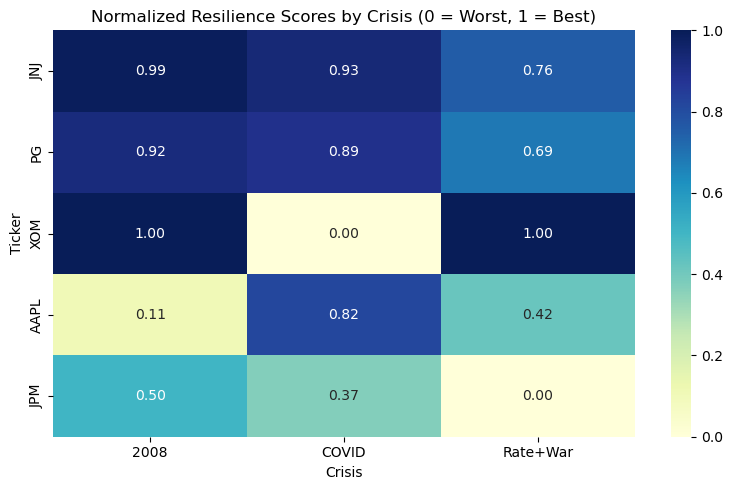

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(resilience_score_sorted.iloc[:, :3], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Normalized Resilience Scores by Crisis (0 = Worst, 1 = Best)")
plt.ylabel("Ticker")
plt.xlabel("Crisis")
plt.tight_layout()
plt.show()

- **JNJ and PG** emerge as the most resilient across all crises, confirming the traditional defensive nature of healthcare and consumer staples.
- **AAPL** is highly resilient post-COVID but vulnerable during earlier crises.
- **JPM** has the lowest overall score, showing high exposure to systemic financial shocks.
- **XOM (Energy)** has highly variable across crises. It performed poorly during the COVID crash — the worst in the dataset, with a 55% drop and long recovery. However, it was the most resilient during the 2022–2023 period, likely benefiting from geopolitical oil shocks. This highlights energy’s unique macro-sensitivity compared to other sectors.


In [35]:
resilience_score.reset_index().to_excel("resilience_scores.xlsx", index=False)

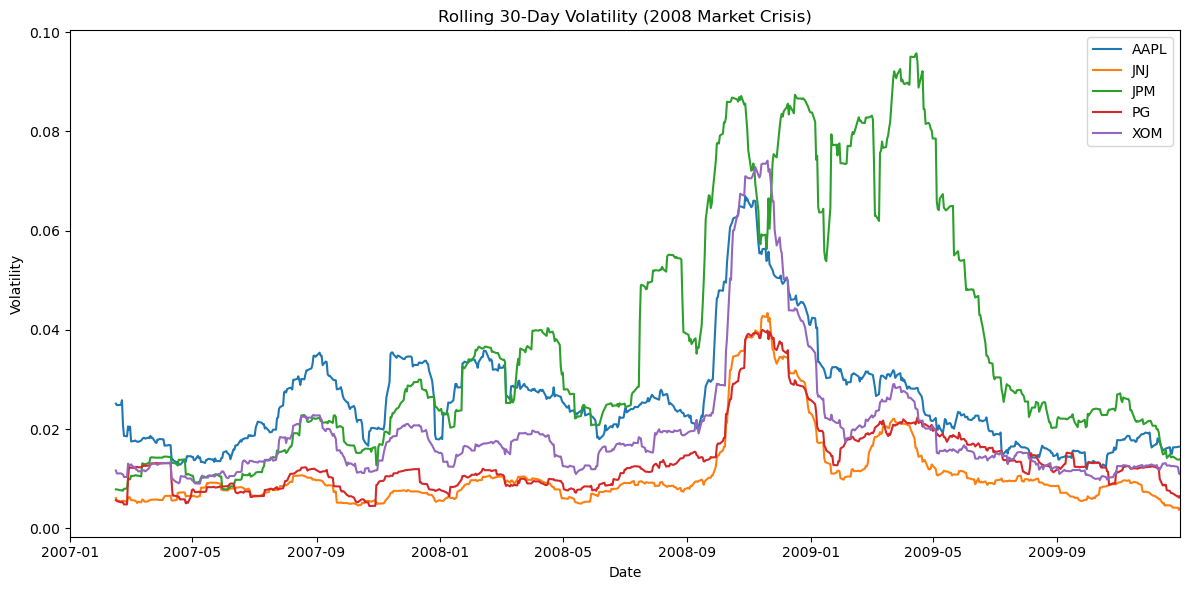

In [36]:
import matplotlib.pyplot as plt

# Calculate volatility
volatility = returns.rolling(window=30).std()

plt.figure(figsize=(12, 6))
for ticker in ['AAPL', 'JNJ', 'JPM', 'PG', 'XOM']:
    plt.plot(volatility.index, volatility[f'Close_{ticker}'], label=ticker)

plt.title("Rolling 30-Day Volatility (2008 Market Crisis)")
plt.xlim(pd.to_datetime('2007-01-01'), pd.to_datetime('2009-12-31'))
plt.ylabel("Volatility")
plt.xlabel("Date")
plt.legend()
plt.tight_layout()
plt.show()

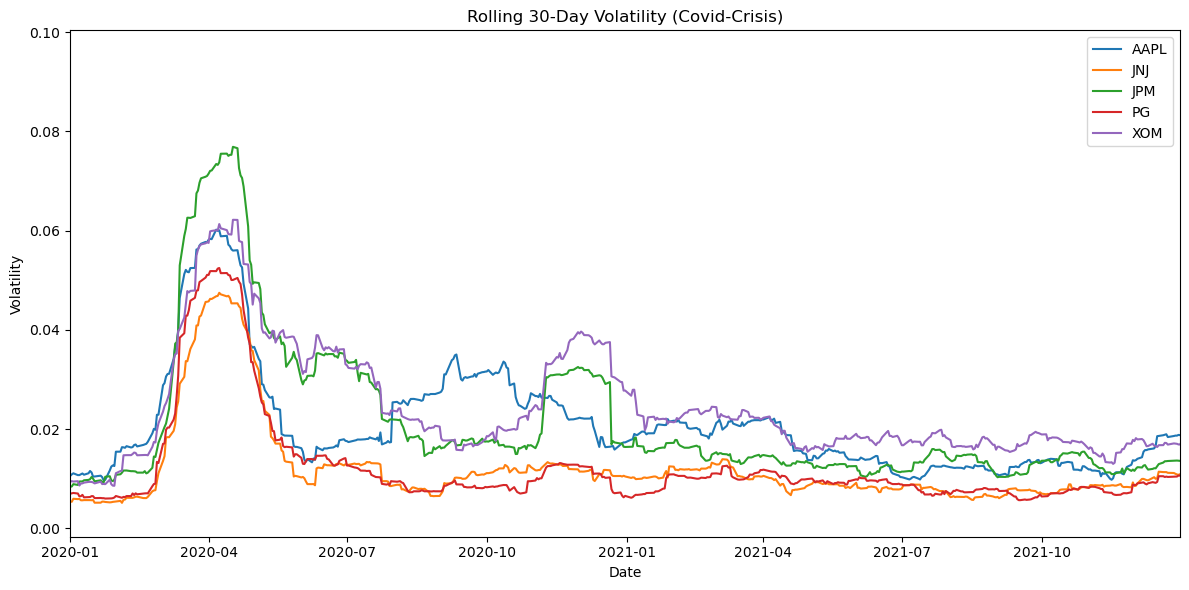

In [84]:
import matplotlib.pyplot as plt

# Calculate volatility
volatility = returns.rolling(window=30).std()

# COVID Period Volatility Plot
plt.figure(figsize=(12, 6))
for ticker in ['AAPL', 'JNJ', 'JPM', 'PG', 'XOM']:
    plt.plot(volatility.index, volatility[f'Close_{ticker}'], label=ticker)

plt.title("Rolling 30-Day Volatility (Covid-Crisis)")
plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2021-12-31'))
plt.ylabel("Volatility")
plt.xlabel("Date")
plt.legend()
plt.tight_layout()
plt.show()

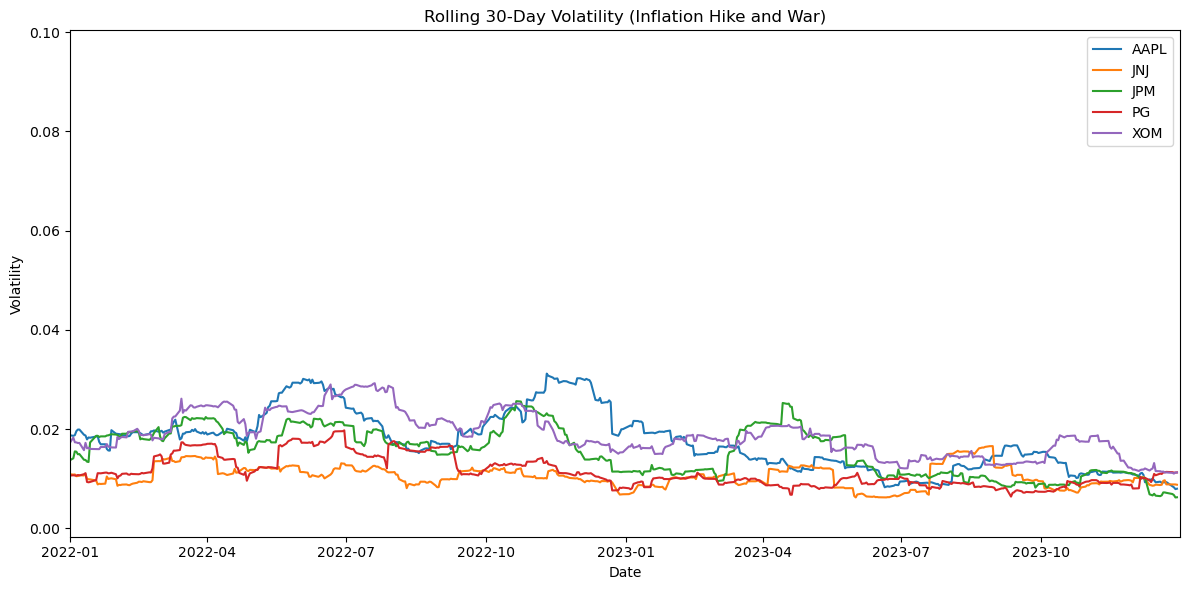

In [86]:
import matplotlib.pyplot as plt

# Calculate volatility
volatility = returns.rolling(window=30).std()

# COVID Period Volatility Plot
plt.figure(figsize=(12, 6))
for ticker in ['AAPL', 'JNJ', 'JPM', 'PG', 'XOM']:
    plt.plot(volatility.index, volatility[f'Close_{ticker}'], label=ticker)

plt.title("Rolling 30-Day Volatility (Inflation Hike and War)")
plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2023-12-31'))
plt.ylabel("Volatility")
plt.xlabel("Date")
plt.legend()
plt.tight_layout()
plt.show()

In [94]:
rolling_volatility = returns.rolling(30).std()
rolling_volatility.dropna(how='any',inplace=True)
rolling_volatility.to_excel("rolling_volatility.xlsx")


This visualization shows the short-term volatility (risk) of each stock, calculated as a 30-day rolling standard deviation of returns, across the three major crisis periods.

#### 2008 Financial Crisis:
- **JPM (Financial)** had the **highest volatility spike**, confirming that financials were the most destabilized during the banking crisis in 2008
- **AAPL (Tech)** also showed significant volatility, reflecting investor panic and sensitivity to future growth expectations.
- **JNJ and PG** had the **lowest volatility**, underlining the defensive nature of healthcare and consumer staples.

#### COVID Crash (2020):
- All stocks experienced a **sharp volatility spike in March 2020**.
- **XOM (Energy)** and **JPM** were among the **most volatile**, showing how both energy demand shock and financial uncertainty were at play.
- **JNJ and PG** again showed more muted reactions, reinforcing their stability.

#### Rate Hike + War (2022–2023):
- **Volatility was more subdued overall**, but:
- **XOM** remained relatively calm, possibly because oil prices were rising.
- **AAPL** and **JPM** had intermittent volatility spikes tied to inflation and interest rate fears.
- Defensive names like **PG and JNJ** continued to show stable volatility patterns.

Volatility spikes align with sector sensitivity:
- Financials and energy = highly crisis-sensitive.
- Tech = volatile but rebounds fast.
- Healthcare and staples = consistently stable.


In [40]:
cumulative_returns = (1 + returns).cumprod()
cumulative_returns.to_excel("cumulative_returns.xlsx", index=True)

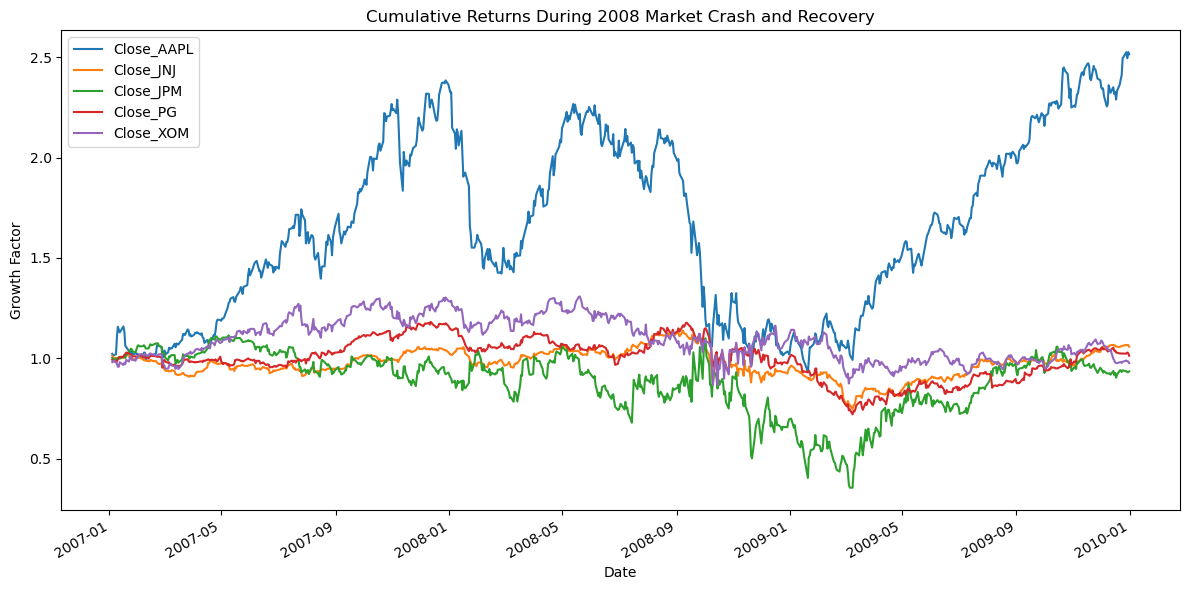

In [41]:
cumulative_returns = (1 + returns).cumprod()

cumulative_returns[['Close_AAPL', 'Close_JNJ', 'Close_JPM', 'Close_PG', 'Close_XOM']].loc['2007-01-01':'2009-12-31'].plot(
    figsize=(12, 6),
    title='Cumulative Returns During 2008 Market Crash and Recovery'
)
plt.ylabel("Growth Factor")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

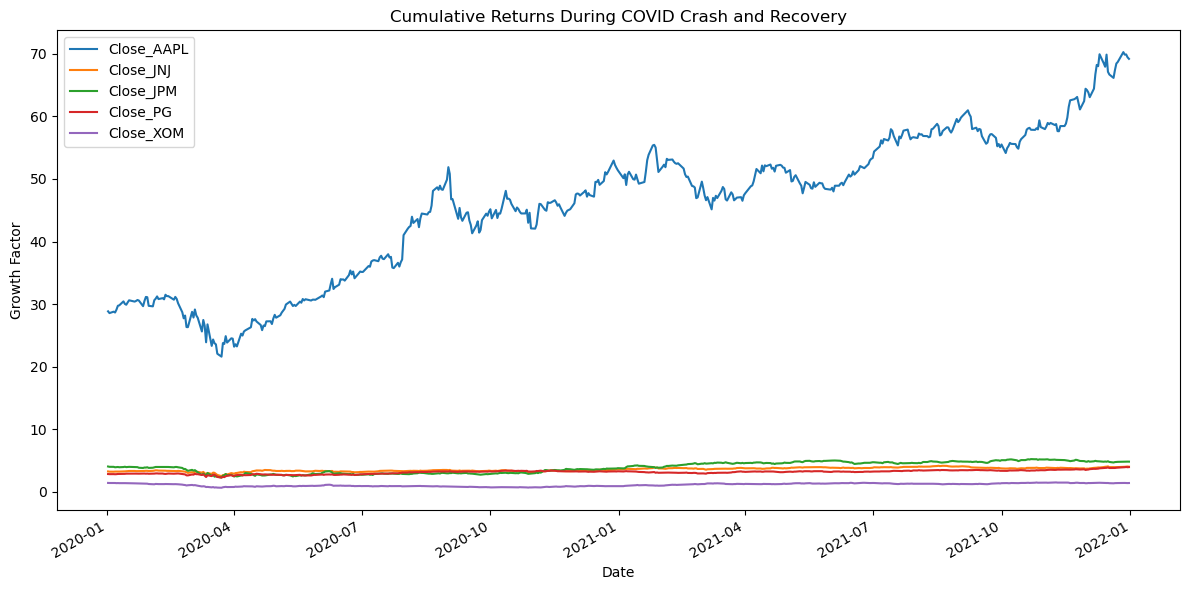

In [42]:
cumulative_returns = (1 + returns).cumprod()

cumulative_returns[['Close_AAPL', 'Close_JNJ', 'Close_JPM', 'Close_PG', 'Close_XOM']].loc['2020-01-01':'2021-12-31'].plot(
    figsize=(12, 6),
    title='Cumulative Returns During COVID Crash and Recovery'
)
plt.ylabel("Growth Factor")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

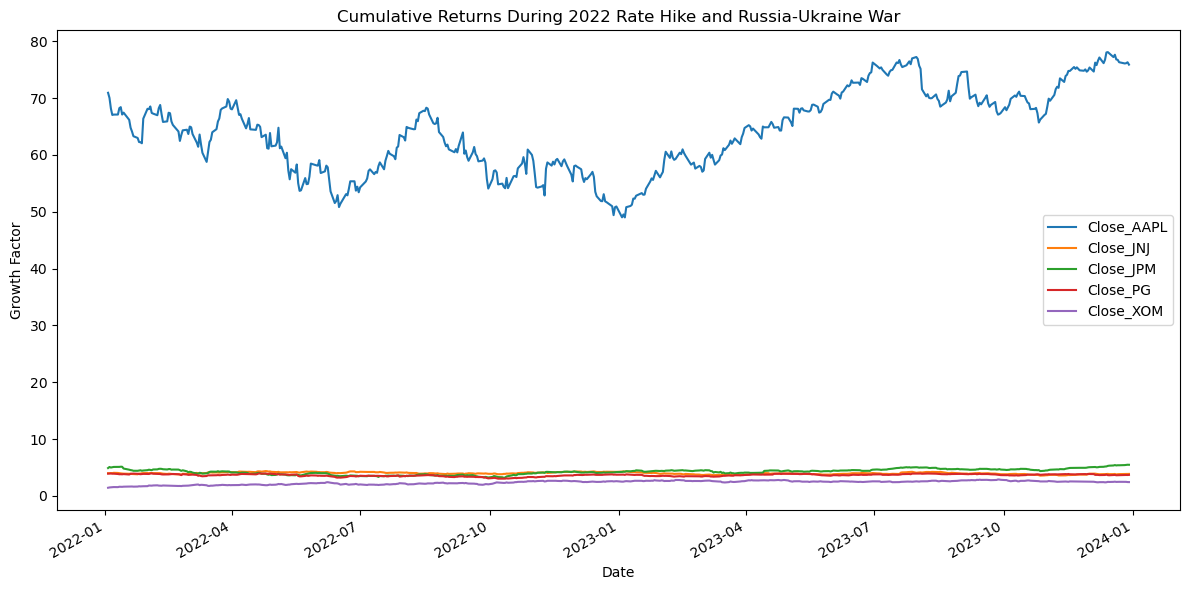

In [43]:
cumulative_returns = (1 + returns).cumprod()

cumulative_returns[['Close_AAPL', 'Close_JNJ', 'Close_JPM', 'Close_PG', 'Close_XOM']].loc['2022-01-01':'2023-12-31'].plot(
    figsize=(12, 6),
    title='Cumulative Returns During 2022 Rate Hike and Russia-Ukraine War'
)
plt.ylabel("Growth Factor")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

### Cumulative Returns Summary Across Crises

#### 2008 Financial Crisis:
- **AAPL** rebounded strongly by 2009.
- **JPM** had a deep drop and lagged in recovery.
- **PG and JNJ** were stable with low returns.

#### COVID Crash (2020–2021):
- **AAPL** had explosive growth after the crash.
- **XOM** was the worst performer, staying flat post-drop.
- **JPM** recovered steadily.
- **PG and JNJ** were stable with modest gains.

#### Inflation + War (2022–2023):
- **AAPL** outperformed all others in returns.
- **XOM**, **PG**, **JNJ**, and **JPM** remained flat, with **XOM near the bottom**.

**Takeaway:**  
- **AAPL** consistently outperformed after crises.
- **XOM** was resilient in drawdowns but underperformed in total returns.
- **PG and JNJ** remained safe but slow-growing.

